In [8]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import time
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols

In [103]:
df = pd.read_csv('final_race_df.csv')
#df = pd.read_csv('final_bike_df.csv')

df2 = pd.read_csv('workouts_final_race_df.csv')
#df2 = pd.read_csv('workouts_final_bike_df.csv')

In [104]:
df['sleep_duration'] = df['rem_sleep_duration'] + df['slow_wave_sleep_duration'] + df['light_sleep_duration']

In [105]:
reg_df = pd.merge(df, df2, how='left')

In [106]:
reg_df = reg_df.drop(df.columns[0], axis=1)
reg_df.columns

Index([u'user_id', u'race_period', u'resting_heart_rate', u'hrv_rmssd', u'time_in_bed', u'latency', u'rem_sleep_duration', u'slow_wave_sleep_duration', u'light_sleep_duration', u'wake_duration', u'cycles_count', u'score', u'recovery_score', u'user_2439', u'user_2456', u'user_2458', u'user_2465', u'user_2466', u'user_2468', u'user_2469', u'user_2473', u'user_2508', u'seconds', u'pace_per_k', u'pace_time', u'FP_5K', u'Wisco_8K', u'Brown_8K', u'VCP_8K', u'FP_10K', u'sleep_duration', u'z1', u'z2',
       u'z3', u'z4', u'z5'],
      dtype='object')

In [107]:
reg_df.head()

,user_id,race_period,resting_heart_rate,hrv_rmssd,time_in_bed,latency,rem_sleep_duration,slow_wave_sleep_duration,light_sleep_duration,wake_duration,cycles_count,score,recovery_score,user_2439,user_2456,user_2458,user_2465,user_2466,user_2468,user_2469,user_2473,user_2508,seconds,pace_per_k,pace_time,FP_5K,Wisco_8K,Brown_8K,VCP_8K,FP_10K,sleep_duration,z1,z2,z3,z4,z5
0,828,1,45.180328,0.059197,32983054.4242,1609090.75758,4505000.00000,3321818.18182,20104090.9091,5053636.36364,7.000000,80.984848,65.426230,0,0,0,0,0,0,0,0,0,1529.2,191.1500,3:11.15,0,0,0,0,0,27930909.09092,580.939394,852.590909,982.393939,1601.742424,321.606061
1,828,2,47.145833,0.055524,35072882.5625,1245231.19792,3633750.00000,4436562.50000,21996562.5000,5001874.94792,5.437500,91.906250,63.802083,0,0,0,0,0,0,0,0,0,1552.3,194.0375,3:14.0375,0,0,1,0,0,30066875.00000,725.676190,593.161905,877.771429,1497.019048,352.838095
2,828,3,45.916667,0.074007,35219680.7292,1261142.54167,1525625.00000,7692187.50000,19688750.0000,6312812.50000,3.364583,87.156250,56.385417,0,0,0,0,0,0,0,0,0,1582.5,197.8125,3:17.8125,0,0,0,1,0,28906562.50000,876.066667,916.114286,664.714286,1752.895238,260.047619
3,828,4,44.663366,0.078605,42391598.3267,1041284.36634,3231386.13861,8411584.15842,21082277.2277,9663564.35644,6.584158,96.257426,70.940594,0,0,0,0,0,0,0,0,0,1932.7,193.2700,3:13.27,0,0,0,0,1,32725247.52473,570.123810,516.809524,864.561905,1844.876190,216.857143
4,828,5,45.400000,0.066477,35584066.6000,1155980.93333,2920000.00000,7196000.00000,19642000.0000,5788000.00000,5.333333,92.866667,58.733333,0,0,0,0,0,0,0,0,0,1617.6,202.2000,3:22.2,0,0,0,1,0,29758000.00000,319.138889,320.833333,339.777778,834.638889,61.861111


In [40]:
result1 = sm.ols(formula="pace_per_k~ hrv_rmssd + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result2 = sm.ols(formula="pace_per_k~ resting_heart_rate + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result3 = sm.ols(formula="pace_per_k~ sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result4 = sm.ols(formula="pace_per_k~ rem_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result5 = sm.ols(formula="pace_per_k~ slow_wave_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result6 = sm.ols(formula="pace_per_k~ light_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result7 = sm.ols(formula="pace_per_k~ time_in_bed + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result8 = sm.ols(formula="pace_per_k~ cycles_count + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result9 = sm.ols(formula="pace_per_k~ time_in_bed + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result10 = sm.ols(formula="pace_per_k~ latency + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result11 = sm.ols(formula="pace_per_k~ score + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result12 = sm.ols(formula="pace_per_k~ recovery_score + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result13 = sm.ols(formula="pace_per_k~ z1 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result14 = sm.ols(formula="pace_per_k~ z2 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result15 = sm.ols(formula="pace_per_k~ z3 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result16 = sm.ols(formula="pace_per_k~ z4 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()
result17 = sm.ols(formula="pace_per_k~ z5 + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()


In [41]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     11.35
Date:                Sat, 23 Jan 2016   Prob (F-statistic):           8.18e-07
Time:                        13:50:06   Log-Likelihood:                -83.663
No. Observations:                  36   AIC:                             197.3
Df Residuals:                      21   BIC:                             221.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    192.5848      4.037     47.705      0.000       184.189   200.980
hrv_rmssd    -28.2545     58.161     -0.486      0.632      -149.207    92.698
user_2456     -5.0702      2.268     -2.235      0.036        -9.787    -0.353
user_2458      8.2872      4.608      1.798      0.087        -1.296    17.870
user_2465     -3.6086      2.991     -1.207      0.241        -9.828     2.611
user_2466      5.8829      4.802      1.225      0.234        -4.102    15.868
user_2468     -4.0590      2.150     -1.888      0.073        -8.531     0.413
user_2469      1.3470      2.681      0.502      0.621        -4.228     6.922
user_2473     -7.1421      3.909     -1.827      0.082       -15.271     0.987
user_2508      9.6309      3.642      2.644      0.015         2.057    17.205
FP_5K        -10.2597      4.803     -2.136      0.045       -20.248    -0.272
Wisco_8K       1.5125      1.962      0.771      0.449        -2.567     5.592
Brown_8K      -0.9447      2.819     -0.335      0.741        -6.807     4.918
VCP_8K        10.4414      1.512      6.907      0.000         7.298    13.585
FP_10K         5.0396      2.047      2.462      0.023         0.783     9.296
==============================================================================
Omnibus:                        1.002   Durbin-Watson:                   2.633
Prob(Omnibus):                  0.606   Jarque-Bera (JB):                0.329
Skew:                           0.187   Prob(JB):                        0.848
Kurtosis:                       3.281   Cond. No.                         127.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     11.45
Date:                Sat, 23 Jan 2016   Prob (F-statistic):           7.56e-07
Time:                        13:50:11   Log-Likelihood:                -83.518
No. Observations:                  36   AIC:                             197.0
Df Residuals:                      21   BIC:                             220.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept            177.2373     21.369      8.294      0.000       132.799   221.676
resting_heart_rate     0.2973      0.465      0.639      0.530        -0.670     1.265
user_2456             -5.2242      2.158     -2.421      0.025        -9.711    -0.737
user_2458              7.5961      3.067      2.477      0.022         1.218    13.974
user_2465             -5.4086      2.462     -2.197      0.039       -10.528    -0.289
user_2466              4.1544      2.206      1.884      0.074        -0.432     8.741
user_2468             -3.0356      2.580     -1.177      0.253        -8.401     2.330
user_2469             -1.7214      6.133     -0.281      0.782       -14.476    11.033
user_2473             -7.8402      2.762     -2.838      0.010       -13.585    -2.095
user_2508              8.7046      3.880      2.244      0.036         0.637    16.772
FP_5K                -11.8289      5.314     -2.226      0.037       -22.880    -0.778
Wisco_8K               1.2353      1.911      0.646      0.525        -2.739     5.210
Brown_8K              -1.1613      2.842     -0.409      0.687        -7.071     4.748
VCP_8K                10.3791      1.458      7.117      0.000         7.346    13.412
FP_10K                 4.8075      1.913      2.513      0.020         0.829     8.786
==============================================================================
Omnibus:                        2.727   Durbin-Watson:                   2.590
Prob(Omnibus):                  0.256   Jarque-Bera (JB):                1.535
Skew:                           0.363   Prob(JB):                        0.464
Kurtosis:                       3.704   Cond. No.                     1.93e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     11.57
Date:                Sat, 23 Jan 2016   Prob (F-statistic):           6.89e-07
Time:                        13:50:17   Log-Likelihood:                -83.348
No. Observations:                  36   AIC:                             196.7
Df Residuals:                      21   BIC:                             220.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept        181.9423     11.534     15.774      0.000       157.956   205.929
sleep_duration  2.936e-07   3.76e-07      0.781      0.443     -4.88e-07  1.07e-06
user_2456         -4.2832      2.583     -1.658      0.112        -9.656     1.089
user_2458          6.4702      2.397      2.699      0.013         1.485    11.456
user_2465         -3.5314      2.541     -1.390      0.179        -8.816     1.753
user_2466          5.2823      2.851      1.853      0.078        -0.647    11.211
user_2468         -3.7651      2.138     -1.761      0.093        -8.211     0.681
user_2469          1.8549      2.431      0.763      0.454        -3.202     6.911
user_2473         -7.1786      3.077     -2.333      0.030       -13.578    -0.779
user_2508         11.3507      4.258      2.666      0.014         2.496    20.205
FP_5K            -13.0224      5.863     -2.221      0.037       -25.214    -0.830
Wisco_8K           0.8965      1.971      0.455      0.654        -3.201     4.994
Brown_8K          -0.7926      2.791     -0.284      0.779        -6.596     5.011
VCP_8K            10.6730      1.542      6.920      0.000         7.465    13.880
FP_10K             4.3495      1.941      2.240      0.036         0.312     8.387
==============================================================================
Omnibus:                        0.636   Durbin-Watson:                   2.544
Prob(Omnibus):                  0.727   Jarque-Bera (JB):                0.163
Skew:                           0.148   Prob(JB):                        0.922
Kurtosis:                       3.147   Cond. No.                     6.76e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.76e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     12.18
Date:                Sat, 23 Jan 2016   Prob (F-statistic):           4.42e-07
Time:                        13:50:24   Log-Likelihood:                -82.533
No. Observations:                  36   AIC:                             195.1
Df Residuals:                      21   BIC:                             218.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept            192.8389      2.382     80.969      0.000       187.886   197.792
rem_sleep_duration  -3.64e-07   2.87e-07     -1.270      0.218      -9.6e-07  2.32e-07
user_2456             -5.2130      2.082     -2.503      0.021        -9.544    -0.882
user_2458              8.6296      2.935      2.940      0.008         2.525    14.734
user_2465             -4.2845      2.092     -2.048      0.053        -8.635     0.066
user_2466              5.2087      2.355      2.212      0.038         0.312    10.106
user_2468             -3.6028      2.094     -1.720      0.100        -7.958     0.753
user_2469              1.6050      2.386      0.673      0.509        -3.357     6.567
user_2473             -6.8450      2.792     -2.452      0.023       -12.651    -1.039
user_2508              9.6899      3.529      2.746      0.012         2.351    17.029
FP_5K                -11.9793      4.826     -2.482      0.022       -22.015    -1.943
Wisco_8K               0.5168      1.958      0.264      0.794        -3.555     4.589
Brown_8K              -0.8762      2.727     -0.321      0.751        -6.547     4.795
VCP_8K                 8.7930      1.797      4.894      0.000         5.057    12.529
FP_10K                 3.3225      2.139      1.553      0.135        -1.126     7.771
==============================================================================
Omnibus:                        1.518   Durbin-Watson:                   2.771
Prob(Omnibus):                  0.468   Jarque-Bera (JB):                0.792
Skew:                           0.347   Prob(JB):                        0.673
Kurtosis:                       3.218   Cond. No.                     6.47e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.47e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     12.02
Date:                Sat, 23 Jan 2016   Prob (F-statistic):           4.97e-07
Time:                        13:50:29   Log-Likelihood:                -82.746
No. Observations:                  36   AIC:                             195.5
Df Residuals:                      21   BIC:                             219.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                  193.8125      3.130     61.917      0.000       187.303   200.322
slow_wave_sleep_duration -5.828e-07   5.02e-07     -1.160      0.259     -1.63e-06  4.62e-07
user_2456                   -6.6633      2.341     -2.846      0.010       -11.532    -1.795
user_2458                    6.2933      2.356      2.671      0.014         1.394    11.193
user_2465                   -4.4364      2.094     -2.119      0.046        -8.790    -0.082
user_2466                    1.6126      2.810      0.574      0.572        -4.232     7.457
user_2468                   -4.0554      2.089     -1.941      0.066        -8.400     0.289
user_2469                    0.4736      2.678      0.177      0.861        -5.096     6.043
user_2473                   -9.6348      2.598     -3.709      0.001       -15.037    -4.232
user_2508                    8.1122      3.770      2.152      0.043         0.273    15.952
FP_5K                      -10.2925      4.679     -2.200      0.039       -20.023    -0.562
Wisco_8K                     2.0432      1.972      1.036      0.312        -2.058     6.145
Brown_8K                    -1.3651      2.777     -0.492      0.628        -7.141     4.411
VCP_8K                      11.3523      1.711      6.635      0.000         7.794    14.910
FP_10K                       6.1688      2.261      2.729      0.013         1.468    10.870
==============================================================================
Omnibus:                        0.023   Durbin-Watson:                   2.860
Prob(Omnibus):                  0.989   Jarque-Bera (JB):                0.077
Skew:                           0.026   Prob(JB):                        0.962
Kurtosis:                       2.780   Cond. No.                     6.42e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.42e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
result6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     16.18
Date:                Sat, 23 Jan 2016   Prob (F-statistic):           3.46e-08
Time:                        13:50:34   Log-Likelihood:                -77.913
No. Observations:                  36   AIC:                             185.8
Df Residuals:                      21   BIC:                             209.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept              176.8025      5.140     34.397      0.000       166.113   187.492
light_sleep_duration  7.119e-07   2.48e-07      2.868      0.009      1.96e-07  1.23e-06
user_2456               -3.7135      1.921     -1.933      0.067        -7.709     0.282
user_2458               10.8891      2.590      4.204      0.000         5.502    16.276
user_2465               -1.0867      2.202     -0.493      0.627        -5.667     3.494
user_2466                7.5000      2.236      3.354      0.003         2.850    12.150
user_2468               -2.8899      1.863     -1.551      0.136        -6.765     0.985
user_2469               -0.4042      2.236     -0.181      0.858        -5.055     4.246
user_2473               -2.9816      2.896     -1.029      0.315        -9.005     3.042
user_2508               12.2692      3.241      3.785      0.001         5.529    19.010
FP_5K                  -19.9652      5.290     -3.774      0.001       -30.966    -8.964
Wisco_8K                -0.3365      1.731     -0.194      0.848        -3.935     3.262
Brown_8K                -1.3366      2.404     -0.556      0.584        -6.337     3.663
VCP_8K                   9.8924      1.236      8.003      0.000         7.322    12.463
FP_10K                   3.0294      1.728      1.754      0.094        -0.563     6.622
==============================================================================
Omnibus:                        1.723   Durbin-Watson:                   2.947
Prob(Omnibus):                  0.422   Jarque-Bera (JB):                1.124
Skew:                          -0.089   Prob(JB):                        0.570
Kurtosis:                       2.153   Cond. No.                     3.09e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.09e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
result7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     11.24
Date:                Sat, 23 Jan 2016   Prob (F-statistic):           8.91e-07
Time:                        13:50:39   Log-Likelihood:                -83.820
No. Observations:                  36   AIC:                             197.6
Df Residuals:                      21   BIC:                             221.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     188.3268     11.231     16.768      0.000       164.970   211.684
time_in_bed  7.079e-08   3.12e-07      0.227      0.823     -5.78e-07   7.2e-07
user_2456      -5.0357      2.776     -1.814      0.084       -10.808     0.736
user_2458       6.4977      2.480      2.620      0.016         1.340    11.656
user_2465      -4.1816      2.899     -1.442      0.164       -10.211     1.848
user_2466       4.0807      2.492      1.638      0.116        -1.101     9.263
user_2468      -3.8083      2.257     -1.688      0.106        -8.501     0.884
user_2469       2.0726      2.616      0.792      0.437        -3.367     7.512
user_2473      -8.1440      3.221     -2.529      0.020       -14.841    -1.447
user_2508      10.1751      4.485      2.269      0.034         0.848    19.503
FP_5K         -10.9375      5.480     -1.996      0.059       -22.335     0.460
Wisco_8K        1.1440      2.054      0.557      0.583        -3.128     5.416
Brown_8K       -0.8594      2.826     -0.304      0.764        -6.737     5.018
VCP_8K         10.2157      1.451      7.042      0.000         7.199    13.232
FP_10K          4.4340      2.210      2.006      0.058        -0.162     9.030
==============================================================================
Omnibus:                        1.118   Durbin-Watson:                   2.638
Prob(Omnibus):                  0.572   Jarque-Bera (JB):                0.403
Skew:                           0.211   Prob(JB):                        0.817
Kurtosis:                       3.302   Cond. No.                     7.77e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.77e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
result8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     12.47
Date:                Sat, 23 Jan 2016   Prob (F-statistic):           3.60e-07
Time:                        13:50:44   Log-Likelihood:                -82.160
No. Observations:                  36   AIC:                             194.3
Df Residuals:                      21   BIC:                             218.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept      195.0169      3.390     57.520      0.000       187.966   202.068
cycles_count    -0.6874      0.476     -1.444      0.163        -1.677     0.303
user_2456       -5.8575      2.075     -2.823      0.010       -10.172    -1.543
user_2458        7.2774      2.399      3.034      0.006         2.289    12.265
user_2465       -4.5984      2.054     -2.239      0.036        -8.869    -0.327
user_2466        4.8988      2.191      2.236      0.036         0.342     9.456
user_2468       -4.1554      2.058     -2.019      0.056        -8.435     0.124
user_2469        1.0932      2.414      0.453      0.655        -3.926     6.112
user_2473       -7.1532      2.602     -2.750      0.012       -12.563    -1.743
user_2508        7.6334      3.745      2.039      0.054        -0.154    15.421
FP_5K          -11.1700      4.639     -2.408      0.025       -20.816    -1.523
Wisco_8K         1.2254      1.838      0.667      0.512        -2.597     5.048
Brown_8K        -0.5997      2.705     -0.222      0.827        -6.225     5.026
VCP_8K           9.4510      1.485      6.366      0.000         6.363    12.539
FP_10K           4.1385      1.871      2.212      0.038         0.248     8.029
==============================================================================
Omnibus:                        0.505   Durbin-Watson:                   2.660
Prob(Omnibus):                  0.777   Jarque-Bera (JB):                0.168
Skew:                           0.166   Prob(JB):                        0.919
Kurtosis:                       3.040   Cond. No.                         62.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
result9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     11.24
Date:                Sat, 23 Jan 2016   Prob (F-statistic):           8.91e-07
Time:                        13:50:48   Log-Likelihood:                -83.820
No. Observations:                  36   AIC:                             197.6
Df Residuals:                      21   BIC:                             221.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     188.3268     11.231     16.768      0.000       164.970   211.684
time_in_bed  7.079e-08   3.12e-07      0.227      0.823     -5.78e-07   7.2e-07
user_2456      -5.0357      2.776     -1.814      0.084       -10.808     0.736
user_2458       6.4977      2.480      2.620      0.016         1.340    11.656
user_2465      -4.1816      2.899     -1.442      0.164       -10.211     1.848
user_2466       4.0807      2.492      1.638      0.116        -1.101     9.263
user_2468      -3.8083      2.257     -1.688      0.106        -8.501     0.884
user_2469       2.0726      2.616      0.792      0.437        -3.367     7.512
user_2473      -8.1440      3.221     -2.529      0.020       -14.841    -1.447
user_2508      10.1751      4.485      2.269      0.034         0.848    19.503
FP_5K         -10.9375      5.480     -1.996      0.059       -22.335     0.460
Wisco_8K        1.1440      2.054      0.557      0.583        -3.128     5.416
Brown_8K       -0.8594      2.826     -0.304      0.764        -6.737     5.018
VCP_8K         10.2157      1.451      7.042      0.000         7.199    13.232
FP_10K          4.4340      2.210      2.006      0.058        -0.162     9.030
==============================================================================
Omnibus:                        1.118   Durbin-Watson:                   2.638
Prob(Omnibus):                  0.572   Jarque-Bera (JB):                0.403
Skew:                           0.211   Prob(JB):                        0.817
Kurtosis:                       3.302   Cond. No.                     7.77e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.77e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
result10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     11.27
Date:                Sat, 23 Jan 2016   Prob (F-statistic):           8.67e-07
Time:                        13:50:52   Log-Likelihood:                -83.770
No. Observations:                  36   AIC:                             197.5
Df Residuals:                      21   BIC:                             221.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    190.2992      2.468     77.103      0.000       185.166   195.432
latency     4.927e-07   1.49e-06      0.331      0.744      -2.6e-06  3.59e-06
user_2456     -5.3392      2.167     -2.464      0.022        -9.845    -0.834
user_2458      6.3203      2.430      2.601      0.017         1.268    11.373
user_2465     -4.5384      2.163     -2.098      0.048        -9.036    -0.041
user_2466      3.7161      2.161      1.720      0.100        -0.778     8.210
user_2468     -4.2230      2.286     -1.847      0.079        -8.978     0.532
user_2469      2.0161      2.498      0.807      0.429        -3.178     7.210
user_2473     -8.6184      2.511     -3.432      0.003       -13.841    -3.396
user_2508      9.8213      3.720      2.640      0.015         2.085    17.558
FP_5K        -10.5240      4.844     -2.173      0.041       -20.597    -0.451
Wisco_8K       1.3150      1.922      0.684      0.501        -2.681     5.311
Brown_8K      -0.9455      2.834     -0.334      0.742        -6.838     4.947
VCP_8K        10.0919      1.502      6.719      0.000         6.968    13.216
FP_10K         4.6252      1.924      2.404      0.026         0.624     8.627
==============================================================================
Omnibus:                        1.860   Durbin-Watson:                   2.677
Prob(Omnibus):                  0.395   Jarque-Bera (JB):                0.880
Skew:                           0.297   Prob(JB):                        0.644
Kurtosis:                       3.485   Cond. No.                     1.41e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
result11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     12.44
Date:                Sat, 23 Jan 2016   Prob (F-statistic):           3.69e-07
Time:                        13:50:56   Log-Likelihood:                -82.201
No. Observations:                  36   AIC:                             194.4
Df Residuals:                      21   BIC:                             218.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    175.1543     11.145     15.717      0.000       151.978   198.331
score          0.1828      0.128      1.426      0.169        -0.084     0.449
user_2456     -2.1083      3.110     -0.678      0.505        -8.575     4.358
user_2458      5.3860      2.422      2.224      0.037         0.349    10.423
user_2465     -2.0042      2.757     -0.727      0.475        -7.738     3.730
user_2466      8.0273      3.611      2.223      0.037         0.517    15.537
user_2468     -3.3415      2.102     -1.590      0.127        -7.713     1.030
user_2469      1.4115      2.377      0.594      0.559        -3.532     6.355
user_2473     -6.6690      2.759     -2.417      0.025       -12.407    -0.931
user_2508     13.8998      4.624      3.006      0.007         4.284    23.515
FP_5K        -17.2515      6.686     -2.580      0.017       -31.156    -3.347
Wisco_8K      -0.2689      2.146     -0.125      0.901        -4.732     4.194
Brown_8K      -1.4390      2.732     -0.527      0.604        -7.121     4.243
VCP_8K         9.7613      1.424      6.855      0.000         6.800    12.722
FP_10K         2.5182      2.381      1.057      0.302        -2.434     7.471
==============================================================================
Omnibus:                        0.280   Durbin-Watson:                   2.413
Prob(Omnibus):                  0.870   Jarque-Bera (JB):                0.083
Skew:                           0.116   Prob(JB):                        0.959
Kurtosis:                       2.958   Cond. No.                     2.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
result12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     11.22
Date:                Sat, 23 Jan 2016   Prob (F-statistic):           9.05e-07
Time:                        13:51:02   Log-Likelihood:                -83.848
No. Observations:                  36   AIC:                             197.7
Df Residuals:                      21   BIC:                             221.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept        190.1711      5.160     36.853      0.000       179.440   200.903
recovery_score     0.0115      0.083      0.139      0.891        -0.161     0.184
user_2456         -5.3601      2.217     -2.418      0.025        -9.970    -0.750
user_2458          6.2018      2.748      2.257      0.035         0.486    11.917
user_2465         -4.6476      2.160     -2.152      0.043        -9.139    -0.156
user_2466          3.8612      2.204      1.752      0.094        -0.723     8.445
user_2468         -3.9878      2.159     -1.847      0.079        -8.479     0.503
user_2469          1.8074      2.510      0.720      0.479        -3.413     7.027
user_2473         -8.7162      2.650     -3.290      0.003       -14.226    -3.206
user_2508          9.7648      3.880      2.517      0.020         1.696    17.833
FP_5K            -10.7841      5.763     -1.871      0.075       -22.769     1.201
Wisco_8K           1.1736      2.153      0.545      0.591        -3.303     5.651
Brown_8K          -0.9244      2.864     -0.323      0.750        -6.880     5.032
VCP_8K            10.1765      1.491      6.826      0.000         7.076    13.277
FP_10K             4.5499      2.145      2.121      0.046         0.089     9.011
==============================================================================
Omnibus:                        1.309   Durbin-Watson:                   2.696
Prob(Omnibus):                  0.520   Jarque-Bera (JB):                0.538
Skew:                           0.252   Prob(JB):                        0.764
Kurtosis:                       3.322   Cond. No.                         905.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
result13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     11.72
Date:                Sat, 23 Jan 2016   Prob (F-statistic):           6.20e-07
Time:                        13:51:06   Log-Likelihood:                -83.152
No. Observations:                  36   AIC:                             196.3
Df Residuals:                      21   BIC:                             220.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    192.6562      2.683     71.804      0.000       187.076   198.236
z1            -0.0022      0.002     -0.920      0.368        -0.007     0.003
user_2456     -5.1930      2.127     -2.441      0.024        -9.617    -0.769
user_2458      6.6704      2.402      2.777      0.011         1.675    11.666
user_2465     -4.7930      2.119     -2.262      0.034        -9.200    -0.386
user_2466      4.0258      2.126      1.894      0.072        -0.395     8.447
user_2468     -3.9050      2.112     -1.849      0.079        -8.297     0.487
user_2469      4.0201      3.360      1.197      0.245        -2.967    11.007
user_2473     -8.4830      2.471     -3.433      0.002       -13.622    -3.344
user_2508      9.6951      3.591      2.700      0.013         2.226    17.164
FP_5K        -11.6050      4.926     -2.356      0.028       -21.849    -1.361
Wisco_8K       0.7613      1.980      0.385      0.704        -3.356     4.878
Brown_8K      -0.8587      2.774     -0.310      0.760        -6.628     4.911
VCP_8K         9.4766      1.639      5.783      0.000         6.069    12.885
FP_10K         3.9076      2.063      1.894      0.072        -0.383     8.199
==============================================================================
Omnibus:                        0.876   Durbin-Watson:                   2.798
Prob(Omnibus):                  0.645   Jarque-Bera (JB):                0.315
Skew:                           0.210   Prob(JB):                        0.854
Kurtosis:                       3.182   Cond. No.                     8.78e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
result14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     12.44
Date:                Sat, 23 Jan 2016   Prob (F-statistic):           3.67e-07
Time:                        13:51:12   Log-Likelihood:                -82.195
No. Observations:                  36   AIC:                             194.4
Df Residuals:                      21   BIC:                             218.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    194.0624      2.867     67.679      0.000       188.099   200.025
z2            -0.0040      0.003     -1.429      0.168        -0.010     0.002
user_2456     -5.6864      2.063     -2.756      0.012        -9.977    -1.396
user_2458      6.5313      2.321      2.814      0.010         1.704    11.359
user_2465     -4.9539      2.069     -2.395      0.026        -9.256    -0.652
user_2466      5.0261      2.229      2.255      0.035         0.391     9.662
user_2468     -2.8939      2.188     -1.323      0.200        -7.444     1.656
user_2469      3.4713      2.607      1.332      0.197        -1.950     8.893
user_2473     -9.6242      2.508     -3.838      0.001       -14.839    -4.410
user_2508     10.6475      3.573      2.980      0.007         3.216    18.079
FP_5K        -13.3217      5.057     -2.634      0.015       -23.838    -2.806
Wisco_8K       0.7189      1.885      0.381      0.707        -3.201     4.638
Brown_8K      -0.8194      2.702     -0.303      0.765        -6.438     4.799
VCP_8K         9.1033      1.593      5.716      0.000         5.791    12.416
FP_10K         3.5054      2.011      1.743      0.096        -0.676     7.687
==============================================================================
Omnibus:                        1.390   Durbin-Watson:                   2.660
Prob(Omnibus):                  0.499   Jarque-Bera (JB):                0.495
Skew:                           0.092   Prob(JB):                        0.781
Kurtosis:                       3.544   Cond. No.                     8.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
result15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     11.28
Date:                Sat, 23 Jan 2016   Prob (F-statistic):           8.59e-07
Time:                        13:51:14   Log-Likelihood:                -83.753
No. Observations:                  36   AIC:                             197.5
Df Residuals:                      21   BIC:                             221.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    190.0968      2.767     68.699      0.000       184.342   195.851
z3             0.0009      0.002      0.361      0.722        -0.004     0.006
user_2456     -5.1914      2.249     -2.308      0.031        -9.869    -0.514
user_2458      6.3705      2.422      2.631      0.016         1.334    11.407
user_2465     -4.8389      2.228     -2.171      0.042        -9.473    -0.205
user_2466      3.1996      2.707      1.182      0.250        -2.430     8.829
user_2468     -4.2158      2.258     -1.867      0.076        -8.911     0.479
user_2469      1.4961      2.671      0.560      0.581        -4.059     7.051
user_2473     -8.2258      2.716     -3.029      0.006       -13.873    -2.578
user_2508      9.2750      3.750      2.473      0.022         1.477    17.073
FP_5K         -9.8099      5.035     -1.948      0.065       -20.282     0.662
Wisco_8K       1.2552      1.926      0.652      0.522        -2.750     5.260
Brown_8K      -1.1283      2.916     -0.387      0.703        -7.192     4.936
VCP_8K        10.4685      1.598      6.551      0.000         7.145    13.792
FP_10K         4.9225      2.027      2.428      0.024         0.707     9.138
==============================================================================
Omnibus:                        0.721   Durbin-Watson:                   2.695
Prob(Omnibus):                  0.697   Jarque-Bera (JB):                0.225
Skew:                           0.178   Prob(JB):                        0.894
Kurtosis:                       3.150   Cond. No.                     1.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
result16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     11.22
Date:                Sat, 23 Jan 2016   Prob (F-statistic):           9.00e-07
Time:                        13:51:15   Log-Likelihood:                -83.839
No. Observations:                  36   AIC:                             197.7
Df Residuals:                      21   BIC:                             221.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    191.2793      3.160     60.529      0.000       184.707   197.851
z4            -0.0002      0.001     -0.172      0.865        -0.003     0.003
user_2456     -5.5356      2.232     -2.480      0.022       -10.177    -0.894
user_2458      6.3833      2.427      2.630      0.016         1.335    11.431
user_2465     -4.7634      2.303     -2.069      0.051        -9.552     0.025
user_2466      3.9329      2.297      1.712      0.102        -0.843     8.709
user_2468     -3.9464      2.154     -1.832      0.081        -8.426     0.533
user_2469      1.8896      2.467      0.766      0.452        -3.240     7.019
user_2473     -8.7096      2.594     -3.357      0.003       -14.104    -3.315
user_2508      9.6074      3.661      2.624      0.016         1.994    17.220
FP_5K        -10.7666      5.410     -1.990      0.060       -22.018     0.485
Wisco_8K       1.3129      1.925      0.682      0.503        -2.691     5.317
Brown_8K      -0.7929      2.856     -0.278      0.784        -6.733     5.147
VCP_8K        10.0956      1.632      6.185      0.000         6.701    13.490
FP_10K         4.5479      2.075      2.192      0.040         0.233     8.862
==============================================================================
Omnibus:                        1.752   Durbin-Watson:                   2.688
Prob(Omnibus):                  0.416   Jarque-Bera (JB):                0.820
Skew:                           0.300   Prob(JB):                        0.664
Kurtosis:                       3.431   Cond. No.                     1.72e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
result17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pace_per_k   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     11.23
Date:                Sat, 23 Jan 2016   Prob (F-statistic):           8.97e-07
Time:                        13:51:16   Log-Likelihood:                -83.831
No. Observations:                  36   AIC:                             197.7
Df Residuals:                      21   BIC:                             221.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    190.9720      1.971     96.869      0.000       186.872   195.072
z5            -0.0004      0.002     -0.196      0.847        -0.005     0.004
user_2456     -4.9368      3.327     -1.484      0.153       -11.856     1.983
user_2458      6.2958      2.465      2.554      0.018         1.169    11.423
user_2465     -4.6938      2.182     -2.152      0.043        -9.231    -0.157
user_2466      3.8326      2.160      1.775      0.090        -0.659     8.324
user_2468     -3.9765      2.152     -1.848      0.079        -8.453     0.500
user_2469      1.8604      2.465      0.755      0.459        -3.266     6.987
user_2473     -8.7136      2.580     -3.377      0.003       -14.079    -3.348
user_2508      9.5657      3.659      2.614      0.016         1.956    17.176
FP_5K        -10.4063      4.832     -2.154      0.043       -20.455    -0.358
Wisco_8K       1.4150      2.002      0.707      0.487        -2.748     5.578
Brown_8K      -0.8389      2.830     -0.296      0.770        -6.723     5.046
VCP_8K        10.1907      1.461      6.977      0.000         7.153    13.228
FP_10K         4.5680      2.007      2.276      0.033         0.394     8.742
==============================================================================
Omnibus:                        1.576   Durbin-Watson:                   2.676
Prob(Omnibus):                  0.455   Jarque-Bera (JB):                0.699
Skew:                           0.278   Prob(JB):                        0.705
Kurtosis:                       3.397   Cond. No.                     6.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#Looking at just the 5 individual days before the race

- Resting Heart Rate is significant 5 days before the race
- Rem Cycles are significant 9 days before the race
- Rem Sleep is significant 1 day before the race
- 

In [2]:
df = pd.read_csv('ten_buildup_days.csv')
df['sleep_duration'] = df['rem_sleep_duration'] + df['slow_wave_sleep_duration'] + df['light_sleep_duration']
dummies = pd.get_dummies(df['user_id'], prefix='user')
temp_df = pd.concat([df, dummies], axis=1)
race_times = pd.read_csv('huxc_race_times.csv')
race_times=race_times[race_times['user_id']!=2461]
race_times=race_times[race_times['user_id']!=2509]
reg_df = temp_df.merge(race_times, how='left')
reg_df = reg_df[reg_df['user_id']!=2439]
reg_df = reg_df.drop(['user_828'], axis=1)
reg_df = reg_df.drop(df.columns[0], axis=1).reset_index(drop=True)

#Use to see if each of the 5 days leading up to a race have significant variables
reg_df0 = reg_df[reg_df['buildup_days']==0].reset_index(drop=True)
reg_df1 = reg_df[reg_df['buildup_days']==1].reset_index(drop=True)
reg_df2 = reg_df[reg_df['buildup_days']==2].reset_index(drop=True)
reg_df3 = reg_df[reg_df['buildup_days']==3].reset_index(drop=True)
reg_df4 = reg_df[reg_df['buildup_days']==4].reset_index(drop=True)
reg_df5 = reg_df[reg_df['buildup_days']==5].reset_index(drop=True)
reg_df6 = reg_df[reg_df['buildup_days']==6].reset_index(drop=True)
reg_df7 = reg_df[reg_df['buildup_days']==7].reset_index(drop=True)
reg_df8 = reg_df[reg_df['buildup_days']==8].reset_index(drop=True)
reg_df9 = reg_df[reg_df['buildup_days']==9].reset_index(drop=True)
reg_df10 = reg_df[reg_df['buildup_days']==10].reset_index(drop=True)

In [5]:
x = sm.ols(formula= "pace_per_k ~ rem_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()

def regression_assumption_plots(regression_fit):

#x = sm.ols(formula= "pace_per_k ~ rem_sleep_duration + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=reg_df).fit()

(array([ 22.,  31.,  32.,  31.,  72.,  61.,  28.,  11.,   1.,   9.]),
 array([-5.02090206, -3.84325858, -2.66561509, -1.4879716 , -0.31032812,
         0.86731537,  2.04495886,  3.22260234,  4.40024583,  5.57788932,
         6.75553281]),
 <a list of 10 Patch objects>)

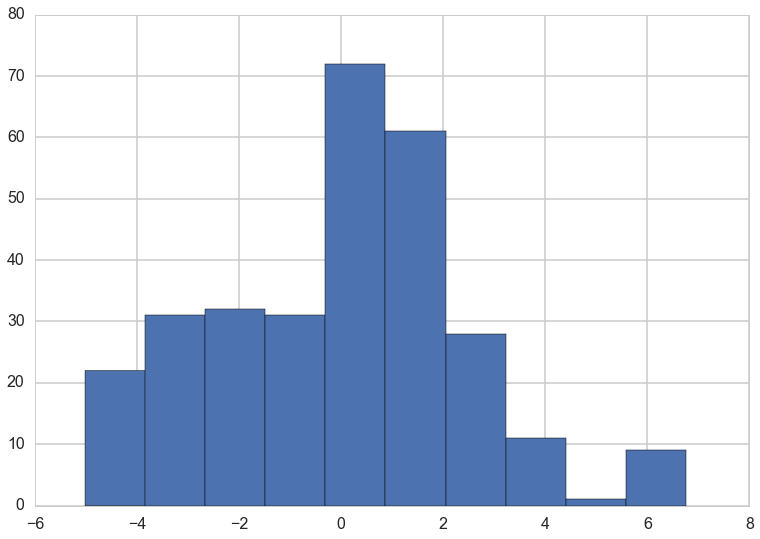

In [13]:
plt.hist(x.resid)

In [109]:
def ols_regressions(y_var, x_vars, df):
    print sm.ols(formula= y_var + "~ " + x_vars + " + user_2456 + user_2458 + user_2465 + user_2466 + user_2468 + user_2469 + user_2473 + user_2508 + FP_5K + Wisco_8K + Brown_8K + VCP_8K + FP_10K", data=df).fit().summary()

In [110]:
result = ols_regressions(y_var = 'pace_per_k', x_vars = 'rem_sleep_duration', df = reg_df0)

                            OLS Regression Results                            
Dep. Variable:             pace_per_k   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     8.975
Date:                Sat, 23 Jan 2016   Prob (F-statistic):           0.000255
Time:                        14:13:44   Log-Likelihood:                -57.754
No. Observations:                  27   AIC:                             145.5
Df Residuals:                      12   BIC:                             164.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept            190.4629      2

#Regression  Assumptions

(array([ 5.,  2.,  7.,  7.,  2.,  5.,  2.,  2.,  2.,  2.]),
 array([ 183.425 ,  186.1475,  188.87  ,  191.5925,  194.315 ,  197.0375,
         199.76  ,  202.4825,  205.205 ,  207.9275,  210.65  ]),
 <a list of 10 Patch objects>)

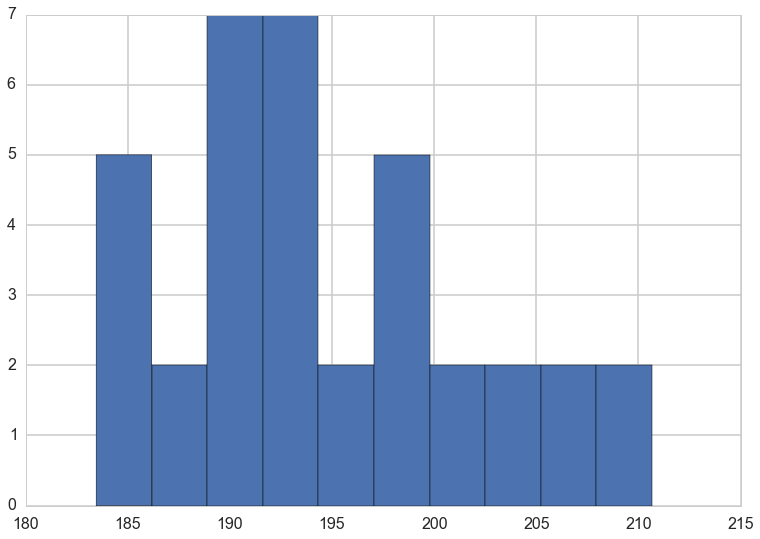

In [129]:
df = pd.read_csv('final_race_df.csv')
y_vars_temp = df.pace_per_k.values
y_vars = []
for i in y_vars_temp:
    if ~np.isnan(i):
        y_vars.append(i)
plt.hist(y_vars)
#plt.hist(np.log(y_vars))